In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [2]:
crime = pd.read_csv('crimestat2.csv', error_bad_lines=False, engine="python")

C:\Users\Ryan\AppData\Local\Temp\ipykernel_13800\3422522221.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crime = pd.read_csv('crimestat2.csv', error_bad_lines=False, engine="python")


In [6]:
crime

,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
0,2.016E+14,11/1/2015 0:00,1/9/2016 0:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,2.016E+14,11/1/2015 0:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,2.015E+14,11/1/2015 0:00,11/1/2015 9:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,2.015E+14,11/1/2015 0:00,11/1/2015 5:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,2.015E+14,11/1/2015 0:00,11/1/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
131672,2.017E+14,11/17/2017 4:15,11/17/2017 4:30,LARCENY-THEFT,16XX E INDIAN SCHOOL RD,85016.0,CONVENIENCE MARKET / STORE
131673,2.017E+14,11/17/2017 5:00,11/17/2017 9:50,MOTOR VEHICLE THEFT,43XX N 103RD AVE,85037.0,APARTMENT
131674,2.017E+14,11/17/2017 5:34,NaN,AGGRAVATED ASSAULT,8XX N 59TH AVE,85043.0,ABANDONED/CONDEMNED STRUCTURE
131675,2.017E+14,11/17/2017 5:50,11/17/2017 7:50,BURGLARY,51XX N 39TH DR,85019.0,SINGLE FAMILY HOUSE


In [4]:
stations = pd.read_csv('Police_Stations.csv', engine="python")


In [5]:
stations

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIPCODE,PHONE_NUMB,ST_NBR,ST_PREDIR,ST_NAME,ST_TYPE,TYPE,ADDR_ZIPPLUS_NBR
0,-112.078867,33.392692,338,1,South Mountain Precinct,400 W Southern Av,Phoenix,AZ,85041,(602) 495-5004,400,W,Southern,Av,Precinct,85041
1,-112.048982,33.429316,339,2,Central City Precinct,1902 S 16th St,Phoenix,AZ,85034,(602) 495-5005,1902,S,16th,St,Precinct,85034
2,-111.961727,33.632461,340,3,Desert Horizon Precinct,16030 N 56th St,Phoenix,AZ,85254,(602) 495-5006,16030,N,56th,St,Precinct,85254
3,-112.037003,33.530984,341,4,Mountain View Precinct,2075 E Maryland Av,Phoenix,AZ,85016,(602) 495-5007,2075,E,Maryland,Av,Precinct,85016
4,-112.192883,33.474351,342,5,Maryvale Precinct,6180 W Encanto Bl,Phoenix,AZ,85033,(602) 495-5008,6180,W,Encanto,Bl,Precinct,85033
5,-112.143411,33.597083,343,6,Cactus Park Precinct,12220 N 39th Av,Phoenix,AZ,85039,(602) 495-5009,12220,N,39th,Av,Precinct,85039
6,-112.081994,33.448525,344,13,Police Headquarters Building,620 W Washington St,Phoenix,AZ,85003,(602) 262-7626,620,W,Washington,St,NonPrecinct,85003
7,-112.087650,33.352254,345,7,Phoenix Reg. Training Academy,10001 S 7th Av,Phoenix,AZ,85041,(602) 262-7122,10001,S,7th,Av,NonPrecinct,85041
8,-112.070354,33.655528,346,12,North Resource Bureau,302 E Union Hills Dr,Phoenix,AZ,85024,(602) 495-5001,302,E,Union Hills,Dr,NonPrecinct,85024
9,-112.069742,33.415226,347,11,South Resource Bureau,3443 S Central Av,Phoenix,AZ,85040,(602) 495-5003,3443,S,Central,Av,NonPrecinct,85040


In [8]:
loc = stations.ZIPCODE

In [9]:
loc

0     85041
1     85034
2     85254
3     85016
4     85033
5     85039
6     85003
7     85041
8     85024
9     85040
10    85024
11    85040
12    85353
13    85044
14    85041
15    85006
16    85006
Name: ZIPCODE, dtype: int64

In [ ]:
85041.0    2548 x3
85034.0    1388
85254.0     924
85016.0    2211
85033.0    1617
85003.0     758
85024.0     495 x2
85040.0    1566 x2
85353.0     598
85044.0    1251
85006.0    1202 x2


In [81]:
TheftFrequency.value_counts().head(60)

85015.0    3636
85008.0    3196
85051.0    2598
85041.0    2548
85032.0    2533
85023.0    2363
85017.0    2317
85035.0    2247
85016.0    2211
85009.0    2184
85022.0    2129
85029.0    2117
85021.0    2076
85043.0    2001
85042.0    1923
85027.0    1707
85033.0    1617
85013.0    1577
85040.0    1566
85020.0    1471
85034.0    1388
85031.0    1352
85018.0    1344
85339.0    1283
85037.0    1266
85044.0    1251
85006.0    1202
85014.0    1177
85019.0    1098
85053.0    1041
85004.0    1007
85254.0     924
85003.0     758
85007.0     758
85085.0     670
85050.0     625
85353.0     598
85308.0     568
85048.0     499
85024.0     495
85012.0     463
85028.0     427
85054.0     369
85306.0     270
85086.0     261
85310.0     226
85083.0     213
85304.0     176
85331.0     170
85307.0      88
85087.0      62
85045.0      35
85255.0      29
85253.0      29
85251.0      25
85301.0       8
85260.0       7
85302.0       6
85303.0       4
85323.0       3
Name: ZIP, dtype: int64

In [91]:
popo = {"85041":2548,"85034":1388,"85254":924,"85016":2211,"85033":1617,"85003":758,"85024":495,"85040":1566,"85353":598,"85044":1251,"85006":1202}

In [92]:
popo

{'85041': 2548,
 '85034': 1388,
 '85254': 924,
 '85016': 2211,
 '85033': 1617,
 '85003': 758,
 '85024': 495,
 '85040': 1566,
 '85353': 598,
 '85044': 1251,
 '85006': 1202}

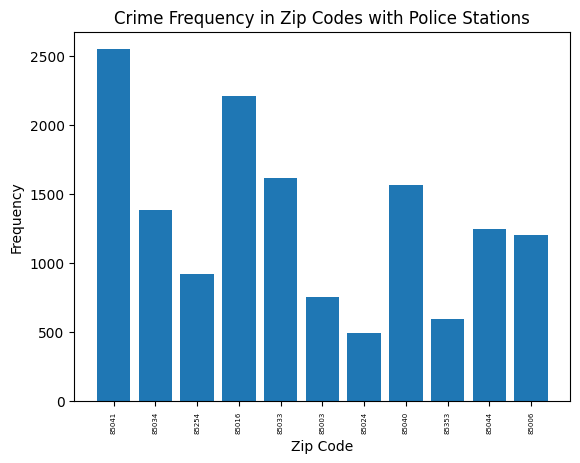

In [96]:
zipc = list(popo.keys())
frequencies = list(popo.values())

plt.bar(zip_codes, frequencies)

plt.title("Crime Frequency in Zip Codes with Police Stations")
plt.xlabel("Zip Code")
plt.ylabel("Frequency")
plt.xticks(fontsize=5, rotation='vertical')

plt.show()

In [99]:
jan = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') & (crime.OCCURRED_ON >= '01/01/2017 0:00') & (crime.OCCURRED_ON < '02/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
febu = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '02/01/2017 0:00') & (crime.OCCURRED_ON < '03/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
mar = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '03/01/2017 0:00') & (crime.OCCURRED_ON < '04/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
apr = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '04/01/2017 0:00') & (crime.OCCURRED_ON < '05/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
may = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '05/01/2017 0:00') & (crime.OCCURRED_ON < '06/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
jun = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '06/01/2017 0:00') & (crime.OCCURRED_ON < '07/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
jul = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '07/01/2017 0:00') & (crime.OCCURRED_ON < '08/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
aug = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '08/01/2017 0:00') & (crime.OCCURRED_ON < '09/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
sep = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '09/01/2017 0:00') & (crime.OCCURRED_ON < '10/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
octo = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '10/01/2017 0:00') & (crime.OCCURRED_ON < '11/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
nov = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '11/01/2017 0:00') & (crime.OCCURRED_ON < '12/01/2017 0:00') & (crime.ZIP==85041.0)].value_counts()
dec = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '12/01/2017 0:00') & (crime.OCCURRED_ON < '01/01/2018 0:00') & (crime.ZIP==85041.0)].value_counts()

In [104]:
janB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') & (crime.OCCURRED_ON >= '01/01/2017 0:00') & (crime.OCCURRED_ON < '02/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
febuB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '02/01/2017 0:00') & (crime.OCCURRED_ON < '03/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
marB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '03/01/2017 0:00') & (crime.OCCURRED_ON < '04/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
aprB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '04/01/2017 0:00') & (crime.OCCURRED_ON < '05/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
mayB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '05/01/2017 0:00') & (crime.OCCURRED_ON < '06/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
junB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '06/01/2017 0:00') & (crime.OCCURRED_ON < '07/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
julB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '07/01/2017 0:00') & (crime.OCCURRED_ON < '08/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
augB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '08/01/2017 0:00') & (crime.OCCURRED_ON < '09/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
sepB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '09/01/2017 0:00') & (crime.OCCURRED_ON < '10/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
octoB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '10/01/2017 0:00') & (crime.OCCURRED_ON < '11/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
novB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '11/01/2017 0:00') & (crime.OCCURRED_ON < '12/01/2017 0:00') & (crime.ZIP==85023.0)].value_counts()
decB = crime.UCR_CRIME_CATEGORY[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT') &(crime.OCCURRED_ON >= '12/01/2017 0:00') & (crime.OCCURRED_ON < '01/01/2018 0:00') & (crime.ZIP==85023.0)].value_counts()

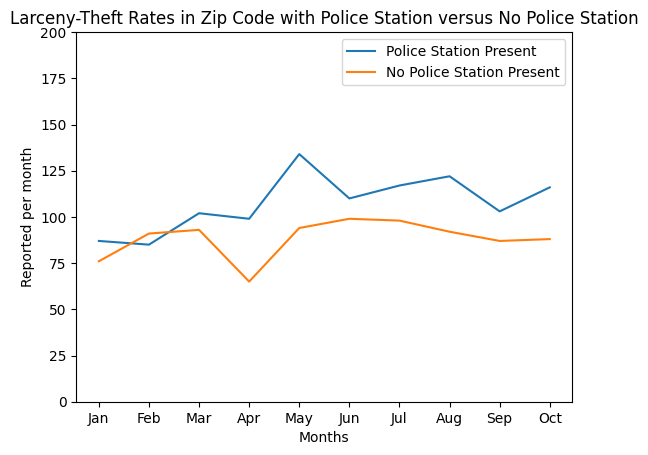

In [110]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
police = {'Jan': jan.sum(), 'Feb': febu.sum(), 'Mar': mar.sum(), 'Apr': apr.sum(), 'May': may.sum(), 'Jun': jun.sum(), 'Jul': jul.sum(), 'Aug': aug.sum(), 'Sep': sep.sum(), 'Oct': octo.sum()}
nopolice = {'Jan': janB.sum(), 'Feb': febuB.sum(), 'Mar': marB.sum(), 'Apr': aprB.sum(), 'May': mayB.sum(), 'Jun': junB.sum(), 'Jul': julB.sum(), 'Aug': augB.sum(), 'Sep': sepB.sum(), 'Oct': octoB.sum()}

pollarc = [police[month] for month in months]
nopollarc = [nopolice[month] for month in months]
plt.plot(months, pollarc, label='Police Station Present')
plt.plot(months, nopollarc, label='No Police Station Present')

plt.xlabel('Months')
plt.ylim(0,200)
plt.ylabel('Reported per month')
plt.title('Larceny-Theft Rates in Zip Code with Police Station versus No Police Station')
plt.legend()
plt.show()

In [12]:
Theft = crime[(crime.UCR_CRIME_CATEGORY=='LARCENY-THEFT')]

In [13]:
TheftFrequency = Theft.ZIP

In [37]:
TheftFrequency

2         85014.0
5         85017.0
6         85085.0
8         85014.0
10        85027.0
           ...   
131663    85033.0
131664    85007.0
131668    85027.0
131669    85254.0
131672    85016.0
Name: ZIP, Length: 66216, dtype: float64